# Generalised Linear Models

We have seen simple linear regression and used it for modeling simple relations in data. In this part, we will try to model more complex relations using generalised linear models. 

## Structure

```{figure} ../images/Prob_Modeling/glms.png
---
height: 150px
width: 350px
name: GLMs
---

Generalised Linear Model (Graphical Representation)
```

The basic structure of a GLM is as shown in the graphical representation (with the box being a plate).

Here, $\beta$ are all the parameters of the model, $x$ is the input data, $y$ is the output data, $f$ is the link function, and $g$ is the distribution function.

In steps:-

1) We take the input data and apply a linear transformation to it. ie $x \rightarrow \theta^Tx$

2) We then apply a link function to the output of the linear transformation. ie $\mu \rightarrow f(\theta^Tx)$

3) We then apply a distribution function to the output of the link function. ie $y \sim g(f(\theta^Tx), \sigma)$

As an example the linear regression model:-

\begin{align}
\mu_i = \theta_0 + \theta_1x_i \\
y_i \sim \mathcal{N}(\mu_i, \sigma^2)
\end{align}

Here $\beta$ signifies both $\theta$ and $\sigma$


* What makes these models linear is that the loss is linear for the parameters $\theta$ (Not exactly after adding a link function, but the gradients are still easy). This makes calculating the gradients easier and also makes the models more interpretable.

* What makes it Generalised is that we can use any distribution function $g$ and any link function $f$. This allows us to model a wide variety of data. 

The most common link functions are the identity function, the sigmoid function, and the softmax function. 

The distribution function can be any exponential function but the most common are the Gaussian distribution, the Bernoulli distribution, and the Multinoulli distribution.



## Example 1 - Poisson Regression

We usually assume a linear model and add a normal error as a model, but often the errors are poissonian in nature. For example, the number of cars passing through a toll booth in a given time interval or the number of photons recieved by a telescope etc.

In [3]:
# Importing Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_style('whitegrid')

Plotting a few poisson distributions, It becomes clear that for larger values of $\lambda$, we can approximate a poisson distribution with a normal distribution.

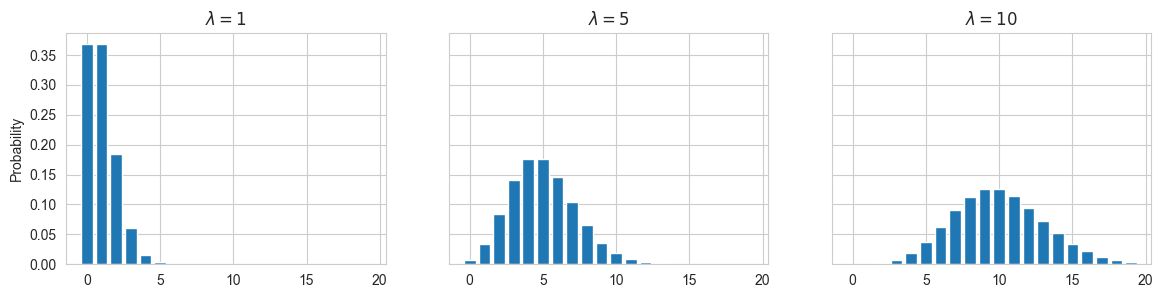

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(14, 3), sharey=True)

xx = np.arange(20)
lambdas = [1, 5, 10]

for i, lam in enumerate(lambdas):
    yy = stats.poisson.pmf(xx, lam)
    axes[i].bar(xx, yy)
    axes[i].set_title(r'$\lambda={}$'.format(lam))
axes[0].set_ylabel("Probability")
plt.show()

Here we simulate some poisson regression data based on the following model:-

\begin{align}
\lambda_i = exp(\theta_0 + \theta_1 x_i) \\
y_i \sim \mathcal{P}(\lambda_i)
\end{align}

So, we have linear function for $\theta$ with x, an exponential link function, and a poisson distribution function.

tensor(-2.3530)


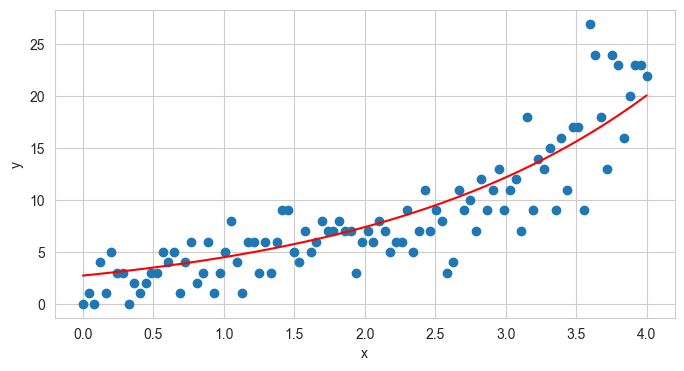

In [20]:
## Stimulating Poisson regression data
import torch
import torch.distributions as dist

torch.manual_seed(42)
theta_0 = 1
theta_1 = 0.5
x = torch.linspace(0, 4, 100)
lambdas = torch.exp(theta_0 + theta_1 * x)
poisson_dist = dist.Poisson(lambdas)
ys = poisson_dist.sample()

# Plotting the data
plt.figure(figsize=(8, 4))
plt.scatter(x, ys, label='observations')
plt.plot(x, lambdas, 'r', label='true expected count')
plt.xlabel('x')
plt.ylabel('y')

print(poisson_dist.log_prob(ys).mean())

Now, we can make a suitable GLM model, for this data and do MLE, MAP or full bayesian inference on it.

Here the tough job is to find the best model. By looking at the data, we can say it has an exponential factor so we can use an exp link function, and the data is natural numbers so a poisson distribution, but we know this by hidsight. In general, we have to try out different models and see which one fits the data best. Say for example a polynomial and gaussian distributioin

Lets do MLE analysis for both the models and see how well they find the mean of the data.

## Example 2 - Logistic Regression

We can make a logistic regression model in the similar way as the linear regression, by using a linear transform, then a sigmoid link function and a bernoulli distribution function. 

We can also make a multinomial logistic regression model by using a softmax link function and a multinoulli distribution function.

For the logistic regression case:-

\begin{align}
z_i = \theta^Tx_i \\
\mu_i =  \sigma(z_i) = \frac{1}{1 + e^{-z_1}} \\
y_i \sim \mathcal{B}(\mu_i) = \mu_i^{y_i}(1 - \mu_i)^{1 - y_i}
\end{align}

For multi class logistic regression:-

\begin{align}
z_{ij} = \theta_j^Tx_i \\
\mu_{ij} = Softmax(z_i) = \frac{e^{z_{ij}}}{\sum_{k=1}^K e^{z_{ik}}} \\
y_i \sim \mathcal{M}(\mu_i) = \prod_{j=1}^K \mu_{ij}^{y_{ij}}
\end{align}

Where the $y_i$ is a one hot vector, and the distribution function being a multinomial distribution.




Softmax and cross entropy with uni and multi logistic regression, also including neural networks